In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import numpy  as np
import pandas as pd
from pymer4.models import Lmer # just import the linear mixed models class
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data_test.csv")
# data.columns
data = data.astype({"image_id" : 'category', "model_type" : 'category', "data_type": 'category'})
data.head()

,image_id,model_type,char_acc,label_len,data_type
0,easy_0_0,baseline,0.1,10,easy
1,easy_0_1,baseline,0.4,10,easy
2,easy_0_2,baseline,0.0,7,easy
3,easy_0_3,baseline,1.0,5,easy
4,easy_0_4,baseline,1.0,13,easy


In [31]:
def define_box_properties(bplot, color_code):
    for patch in bplot['boxes'] :
        patch.set_facecolor(color_code)

In [21]:
color_baseline = '#ffbfcb'
color_srcnn = '#afd9e7'
color_tsrn = '#91ee8e'
color_tbsrn = '#f9dea9'

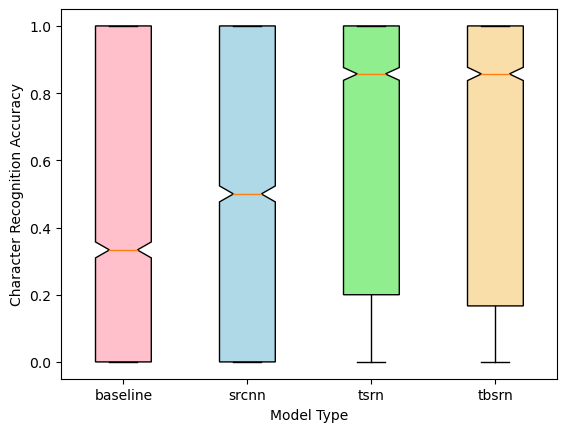

In [34]:
acc_base_line = data[data['model_type'] == 'baseline']['char_acc'].to_numpy()
acc_srcnn = data[data['model_type'] == 'srcnn']['char_acc'].to_numpy()
acc_tbsrn = data[data['model_type'] == 'tbsrn']['char_acc'].to_numpy()
acc_tsrn = data[data['model_type'] == 'tsrn']['char_acc'].to_numpy()
fig, ax = plt.subplots()
# ax.boxplot(acc_base_line)
bplot = ax.boxplot([acc_base_line, acc_srcnn, acc_tsrn, acc_tbsrn], vert=True, notch=True, patch_artist=True)
colors = [color_baseline, color_srcnn, color_tsrn, color_tbsrn]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['baseline', 'srcnn', 'tsrn', 'tbsrn'])
plt.xlabel('Model Type')
plt.ylabel('Character Recognition Accuracy')
plt.savefig('median_all_data_notch.png')

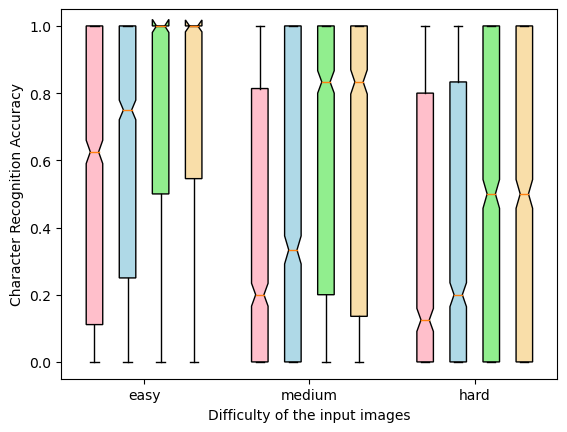

In [35]:
acc_base_line_easy = data[(data['model_type'] == 'baseline') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_base_line_medium = data[(data['model_type'] == 'baseline') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_base_line_hard = data[(data['model_type'] == 'baseline') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()
acc_srcnn_easy = data[(data['model_type'] == 'srcnn') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_srcnn_medium = data[(data['model_type'] == 'srcnn') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_srcnn_hard = data[(data['model_type'] == 'srcnn') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()
acc_tbsrn_easy = data[(data['model_type'] == 'tbsrn') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_tbsrn_medium = data[(data['model_type'] == 'tbsrn') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_tbsrn_hard = data[(data['model_type'] == 'tbsrn') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()
acc_tsrn_easy = data[(data['model_type'] == 'tsrn') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_tsrn_medium = data[(data['model_type'] == 'tsrn') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_tsrn_hard = data[(data['model_type'] == 'tsrn') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()

fig, ax = plt.subplots()
# ax.boxplot(acc_base_line)
plt_acc_base_line = ax.boxplot([acc_base_line_easy, acc_base_line_medium, acc_base_line_hard], vert=True,  patch_artist=True, notch=True, positions=[1,6,11])
plt_acc_srcnn = ax.boxplot([acc_srcnn_easy, acc_srcnn_medium, acc_srcnn_hard], vert=True, patch_artist=True, notch=True, positions=[2,7,12])
plt_acc_tsrn = ax.boxplot([acc_tsrn_easy, acc_tsrn_medium, acc_tsrn_hard], vert=True, patch_artist=True, notch=True, positions=[3,8,13])
plt_acc_tbsrn = ax.boxplot([acc_tbsrn_easy, acc_tbsrn_medium, acc_tbsrn_hard], vert=True, patch_artist=True, notch=True, positions=[4,9,14])

define_box_properties(plt_acc_base_line, color_baseline)
define_box_properties(plt_acc_srcnn, color_srcnn)
define_box_properties(plt_acc_tsrn, color_tsrn)
define_box_properties(plt_acc_tbsrn, color_tbsrn)

ticks = ['easy', 'medium', 'hard']
plt.xticks([2.5, 7.5, 12.5], ticks)
plt.xlim(0, 15)
plt.xlabel('Difficulty of the input images')
plt.ylabel('Character Recognition Accuracy')
plt.savefig('median_data_type_notch.png')

In [36]:
differentMeans_model = Lmer(formula = "char_acc ~ model_type + (1 | image_id)", data = data)
differentMeans_model.fit(factors = {"model_type" : ["baseline", "srcnn", "tsrn", "tbsrn"]}, REML = False, summarize = False)

In [37]:
commonMean_model = Lmer(formula = "char_acc ~ (1 | image_id)", data = data)
commonMean_model.fit(REML = False, summarize = False)

In [38]:
def GLRT(mod1, mod2):

    chi_square = 2 * abs(mod1.logLike - mod2.logLike)
    delta_params = abs(len(mod1.coefs) - len(mod2.coefs))

    return {"chi_square" : chi_square, "df": delta_params, "p" : 1 - stats.chi2.cdf(chi_square, df=delta_params)}

In [39]:
GLRT(differentMeans_model, commonMean_model)

{'chi_square': 2708.679103880312, 'df': 3, 'p': 0.0}

In [40]:
post_hoc_results = differentMeans_model.post_hoc(marginal_vars = ["model_type"])

P-values adjusted by tukey method for family of 6 estimates


In [41]:
post_hoc_results[0]

,model_type,Estimate,2.5_ci,97.5_ci,SE,DF
0,baseline,0.441,0.428,0.453,0.006,inf
1,srcnn,0.493,0.481,0.506,0.006,inf
2,tbsrn,0.639,0.626,0.651,0.006,inf
3,tsrn,0.641,0.628,0.653,0.006,inf


In [42]:
print(post_hoc_results[0].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
model\_type &  Estimate &  2.5\_ci &  97.5\_ci &     SE &   DF \\
\midrule
  baseline &     0.441 &   0.428 &    0.453 &  0.006 &  inf \\
     srcnn &     0.493 &   0.481 &    0.506 &  0.006 &  inf \\
     tbsrn &     0.639 &   0.626 &    0.651 &  0.006 &  inf \\
      tsrn &     0.641 &   0.628 &    0.653 &  0.006 &  inf \\
\bottomrule
\end{tabular}



In [13]:
post_hoc_results[1]

,Contrast,Estimate,2.5_ci,97.5_ci,SE,DF,Z-stat,P-val,Sig
0,baseline - srcnn,-0.052,-0.064,-0.041,0.005,inf,-11.476,0.000,***
1,baseline - tbsrn,-0.198,-0.210,-0.186,0.005,inf,-43.446,0.000,***
2,baseline - tsrn,-0.200,-0.212,-0.188,0.005,inf,-43.884,0.000,***
3,srcnn - tbsrn,-0.146,-0.157,-0.134,0.005,inf,-31.971,0.000,***
4,srcnn - tsrn,-0.148,-0.159,-0.136,0.005,inf,-32.409,0.000,***
5,tbsrn - tsrn,-0.002,-0.014,0.010,0.005,inf,-0.438,0.972,


In [43]:
print(post_hoc_results[1].to_latex(index=False))

\begin{tabular}{lrrrrrrrl}
\toprule
         Contrast &  Estimate &  2.5\_ci &  97.5\_ci &     SE &   DF &  Z-stat &  P-val &  Sig \\
\midrule
 baseline - srcnn &    -0.052 &  -0.064 &   -0.041 &  0.005 &  inf & -11.476 &  0.000 &  *** \\
 baseline - tbsrn &    -0.198 &  -0.210 &   -0.186 &  0.005 &  inf & -43.446 &  0.000 &  *** \\
  baseline - tsrn &    -0.200 &  -0.212 &   -0.188 &  0.005 &  inf & -43.884 &  0.000 &  *** \\
    srcnn - tbsrn &    -0.146 &  -0.157 &   -0.134 &  0.005 &  inf & -31.971 &  0.000 &  *** \\
     srcnn - tsrn &    -0.148 &  -0.159 &   -0.136 &  0.005 &  inf & -32.409 &  0.000 &  *** \\
     tbsrn - tsrn &    -0.002 &  -0.014 &    0.010 &  0.005 &  inf &  -0.438 &  0.972 &      \\
\bottomrule
\end{tabular}

